# Markov Chains

## Definition

If we have a sequence of random variables $X_1, X_2, ..., X_n$ where the indices $1,2,…,n$ represent successive points in time, we can use the chain rule of probability to calculate the probability of the entire sequence:

$$Pr(X_1, X_2, ..., X_n) = Pr(X_1) Pr(X_2 | X_1) Pr(X_3 | X_2, X_1) ... Pr(X_n | X_{n-1}, X_{n-2}, ..., X_{2}, X_1 )$$

Markov Chains simplify this expression by using the *Markov assumption*. This assumption is that given the entire past history, the probability distribution for the random variable at the next step *only depends on the current variable*. Mathematically, the assumption is written like this

$$Pr(X_{t+1} | X_t, X_{t-1}, ..., X_2, X_1) = Pr(X_{t+1} | X_t)$$

which is much simpler than the original.  It consists of an initial distribution for the first variable, $P(X_1)$, and $n−1$ transition probabilities. We usually make one more assumption: that the transition probabilities do not change with time. Hence, the transition from time $t$ to time $t+1$ depends only on the value of $X_t$.

## Examples of Markov Chains

### Discrete Markov Chains

Suppose you have a secret number (make it an integer) between 1 and 5. We will call it your initial number at step 1. Now for each time step, your secret number will change according to the following rules:

1. Flip a coin.
    - If the coin turns up heads, then increase your secret number by one (5 increases to 1).
    - If the coin turns up tails, then decrease your secret number by one (1 decreases to 5).
2. Repeat $n$ times, and record the evolving history of your secret number.
    
Before the experiment, we can think of the sequence of secret numbers as a sequence of random variables, each taking on a value in ${1,2,3,4,5}$. Assume that the coin is fair, so that with each flip, the probability of heads and tails are both $0.5$.

Does this game qualify as a true Markov chain? Suppose your secret number is currently $4$ and that the history of your secret numbers is $(2,1,2,3)$. What is the probability that on the next step, your secret number will be 5? What about the other four possibilities? Because of the rules of this game, the probability of the next transition will depend only on the fact that your current number is $4$. The numbers further back in your history are irrelevant, so this is a Markov chain.

This is an example of a discrete Markov chain, where the possible values of the random variables come from a discrete set. Those possible values (secret numbers in this example) are called states of the chain. The states are usually numbers, as in this example, but they can represent anything. In one common example, the states describe the weather on a particular day, which could be labeled as 1-fair, 2-poor.

### Random walk (continuous)

Now let's look at a continuous example of a Markov chain. Say $X_t = 0$ and we have the following transition model: p(Xt+1|Xt=xt)=N(xt,1). That is, the probability distribution for the next state is Normal with variance $1$ and mean equal to the current state. This is often referred to as a *random walk*. Clearly, it is a Markov chain because the transition to the next state $X_t+1$ only depends on the current state $X_t$.


In [3]:
import random
import numpy as np
import pandas as pd
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import beta

from matplotlib import pyplot as plt


In [39]:
def table( y, freq=True ):
    unique_values, counts = np.unique(y, return_counts=True)
    if not freq:
        counts = counts / len(y)
    value_counts = dict(zip(unique_values, counts))
    return value_counts

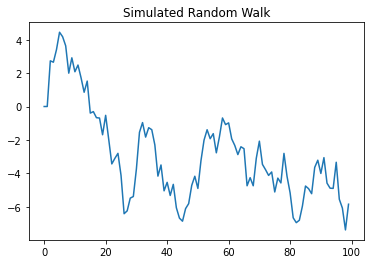

In [89]:
random.seed(515)

n = 100
x = np.zeros(n)

for i in range(2, n):
    # draw one sample  from a normal distribution using scipy.stats
    x[i] = norm.rvs(loc=x[i-1], scale=1.0, size=1)
    
plt.plot(x)
plt.title('Simulated Random Walk')
plt.show()

### Transition Matrix

Let's return to our example of the discrete Markov Chain. If we assume that transition probabilities do nor change with time, then there are a total of $25 = 5^2$ potential transition probabilities. Potential reansition probabilities would be from State 1 to State 2, State 1 to State 3, and so forth. These transition probailities can be arranged into a matrix Q:

$$
Q = \begin{bmatrix}
0 & 0.5 & 0 & 0 & 0.5 \\
0.5 & 0 & 0.5 & 0 & 0 \\
0 & 0.5 & 0 & 0.5 & 0 \\
0 & 0 & 0.5 & 0 & 0.5 \\
0.5 & 0 & 0 & 0.5 & 0
\end{bmatrix}
$$

Where the transition from State 1 are in the first row, the transition from State 2 are in the second row, and so forth. The transition probabilities are the elements of the matrix. The matrix is called the *transition matrix*.

The transition matrix is speciallly useful if we wat to find the probailities associated with multiple steps of the chain at once. For example, if we want to find the probability of being in State 3 after 3 steps, we can use the transition matrix to calculate the probability of being in State 3 after 1 step, then the probability of being in State 3 after 2 steps, and finally the probability of being in State 3 after 3 steps. The probability of being in State 3 after 3 steps is the product of the probabilities of being in State 3 after 1 step, State 3 after 2 steps, and State 3 after 3 steps. This is written as:

$$Pr(X_3 = 3) = Pr(X_1 = 3) Pr(X_2 = 3 | X_1 = 3) Pr(X_3 = 3 | X_2 = 3)$$


In [14]:
Q = np.array([[0, 0.5, 0, 0, 0.5], 
              [0.5, 0, 0.5, 0, 0],
              [0, 0.5, 0, 0.5, 0],
              [0, 0, 0.5, 0, 0.5],
              [0.5, 0, 0, 0.5, 0]])

# matrix power of Q by 2
Q2 = np.linalg.matrix_power(Q, 2)
Q2

array([[0.5 , 0.  , 0.25, 0.25, 0.  ],
       [0.  , 0.5 , 0.  , 0.25, 0.25],
       [0.25, 0.  , 0.5 , 0.  , 0.25],
       [0.25, 0.25, 0.  , 0.5 , 0.  ],
       [0.  , 0.25, 0.25, 0.  , 0.5 ]])

In [15]:
Q2[1,3]


0.25

### Stationary Distribution

Suppose we want to know the probability distribution of the your secret number in the distant future, say $Pr(X_{t+h}|X_t)$ where $h$ is a large number. Let’s calculate this for a few different values of $h$

In [17]:
Q5 = np.linalg.matrix_power(Q, 5)
Q5

array([[0.0625 , 0.3125 , 0.15625, 0.15625, 0.3125 ],
       [0.3125 , 0.0625 , 0.3125 , 0.15625, 0.15625],
       [0.15625, 0.3125 , 0.0625 , 0.3125 , 0.15625],
       [0.15625, 0.15625, 0.3125 , 0.0625 , 0.3125 ],
       [0.3125 , 0.15625, 0.15625, 0.3125 , 0.0625 ]])

In [18]:
Q10 = np.linalg.matrix_power(Q, 10)
Q10

array([[0.24804688, 0.16113281, 0.21484375, 0.21484375, 0.16113281],
       [0.16113281, 0.24804688, 0.16113281, 0.21484375, 0.21484375],
       [0.21484375, 0.16113281, 0.24804688, 0.16113281, 0.21484375],
       [0.21484375, 0.21484375, 0.16113281, 0.24804688, 0.16113281],
       [0.16113281, 0.21484375, 0.21484375, 0.16113281, 0.24804688]])

In [19]:
Q30 = np.linalg.matrix_power(Q, 30)
Q30

array([[0.20069309, 0.19943928, 0.20021418, 0.20021418, 0.19943928],
       [0.19943928, 0.20069309, 0.19943928, 0.20021418, 0.20021418],
       [0.20021418, 0.19943928, 0.20069309, 0.19943928, 0.20021418],
       [0.20021418, 0.20021418, 0.19943928, 0.20069309, 0.19943928],
       [0.19943928, 0.20021418, 0.20021418, 0.19943928, 0.20069309]])

Notice that as the future horizon gets more distant, the transition distributions appear to converge. The state you are currently in becomes less important in determining the more distant future. If we let $h$ get really large, and take it to the limit, all the rows of the long-range transition matrix will become equal to $(.2,.2,.2,.2,.2)$. That is, if you run the Markov chain for a very long time, the probability that you will end up in any particular state is $1/5=.2$ for each of the five states. These long-range probabilities are equal to what is called the stationary distribution of the Markov chain.

The stationary distribution of a chain is the initial state distribution for which performing a transition will not change the probability of ending up in any given state. That is,

In [20]:
# multiply Q30 by the initial distribution
Q30 @ np.array([0.2, 0.2, 0.2, 0.2, 0.2])


array([0.2, 0.2, 0.2, 0.2, 0.2])

One consequence of this property is that once a chain reaches its stationary distribution, the stationary distribution will remain the distribution of the states thereafter.

We can also demonstrate the stationary distribution by simulating a long chain from this example.

In [44]:
n = 5000
x = np.zeros(n)
x[1] = 1
x[0] = 1

for i in range(2, n):
    # draw the next state rom the integer 0 to 4 with probability s from the transition matrix Q, based on the previous value of X
    x[i] = np.random.choice(5, p=Q[int(x[i-1]),])
    
table(x, freq=False)

{0.0: 0.199, 1.0: 0.1986, 2.0: 0.1974, 3.0: 0.2056, 4.0: 0.1994}

The overall distribution of the visits to the states is approximately equal to the stationary distribution.

As we have just seen, if you simulate a Markov chain for many iterations, the samples can be used as a Monte Carlo sample from the stationary distribution. This is exactly how we are going to use Markov chains for Bayesian inference. In order to simulate from a complicated posterior distribution, we will set up and run a Markov chain whose stationary distribution is the posterior distribution.

It is important to note that the stationary distribution doesn’t always exist for any given Markov chain. The Markov chain must have certain properties, which we won’t discuss here. However, the Markov chain algorithms we’ll use in future lessons for Monte Carlo estimation are guaranteed to produce stationary distributions.

### Continuous Example

The continuous random walk example we gave earlier does not have a stationary distribution. However, we can modify it so that it does have a stationary distribution.

Let the transition distribution be $Pr(X_{t+1}|X_t=x_t)=N(\phi x_t,1)$ where $−1 < \phi < 1$. That is, the probability distribution for the next state is Normal with variance $1$ and mean equal to $\phi$ times the current state. As long as $\phi$ is between −1 and 1, then the stationary distribution will exist for this model.

Let's simulate this chain for $\phi=0.6$.

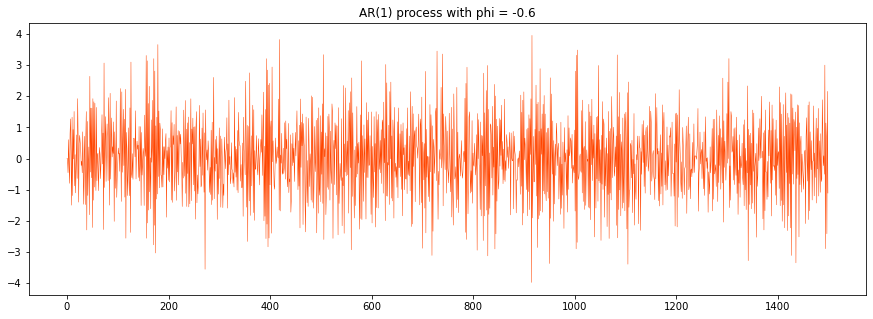

In [85]:
n = 1500
x = np.zeros(n)
phi = -0.6

for i in range(2, n):
    # draw one sample from a normal distribution with mean phi * x[i-1] and standard deviation 1
    x[i] = norm.rvs(loc=phi * x[i-1], scale=1.0, size=1)
    
plt.figure(figsize=(15, 5))
plt.plot(x, linewidth=0.5, color='orangered')
plt.title('Random Walk process with phi = -0.6')
plt.show()

The theoretical stationary distribution for this chain is normal with mean $0$ and variance $1/(1−\phi^2)$, which in our example approximately equals 1.562. Let's look at a histogram of our chain and compare that with the theoretical stationary distribution.



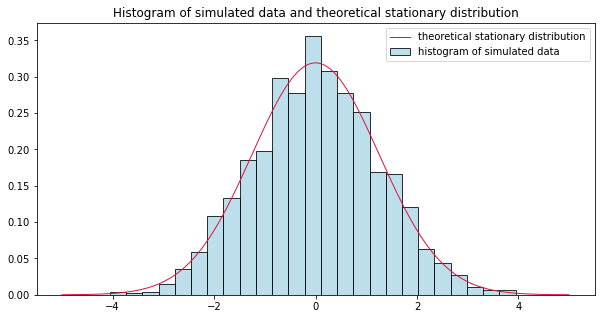

In [83]:
plt.figure(figsize=(10, 5))
plt.hist(x, bins = 25, density=True, ec="black", fc="lightblue", alpha=0.8 )
# plot the normal distribution curve
x0 = np.linspace(-5, 5, 1500)
plt.plot(x0, norm.pdf(x0, loc=0, scale= np.sqrt(1.0/(1.0-phi**2))), linewidth=1, color='crimson')
plt.legend(['theoretical stationary distribution', "histogram of simulated data" ])
plt.title("Histogram of simulated data and theoretical stationary distribution")
plt.show()


## Exercises


In [90]:
Q_chess = np.array([[0, 1], [0.3, 0.7]])
Q_chess

array([[0. , 1. ],
       [0.3, 0.7]])

Question 3
Continuing the chess example, suppose that the first game is between Players B and C. What is the probability that Player A will play in Game 4? Round your answer to two decimal places.

In [98]:
Q_chess_4 = np.linalg.matrix_power(Q_chess, 4)
Q_chess_4 @ np.array([1.0, 0])


array([0.237 , 0.2289])

In [97]:
Q_stat = np.linalg.matrix_power(Q_chess, 100)
Q_stat @ np.array([1.0, 0])

array([0.23076923, 0.23076923])

In [94]:
np.linalg.matrix_power(Q_stat, 4)

array([[0.23076923, 0.76923077],
       [0.23076923, 0.76923077]])